# CNN Keras CIFAR10

In [4]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear  
# inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# load the training and testing data, scale it into the range [0, 1],
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.fit_transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

[INFO] loading CIFAR-10 data...


In [10]:
from classifiers.keras_cnn import KerasCNN

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
kerasCNN = KerasCNN();
model = kerasCNN.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=40, verbose=1)

[INFO] compiling model...
[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 27s 535us/step - loss: 1.7986 - acc: 0.3687 - val_loss: 1.6520 - val_acc: 0.4270
Epoch 2/40
50000/50000 [==============================] - 19s 385us/step - loss: 1.5372 - acc: 0.4679 - val_loss: 1.4682 - val_acc: 0.4771
Epoch 3/40
50000/50000 [==============================] - 19s 386us/step - loss: 1.3849 - acc: 0.5182 - val_loss: 1.3773 - val_acc: 0.5006
Epoch 4/40
50000/50000 [==============================] - 19s 386us/step - loss: 1.2998 - acc: 0.5468 - val_loss: 1.3069 - val_acc: 0.5369
Epoch 5/40
50000/50000 [==============================] - 19s 382us/step - loss: 1.2445 - acc: 0.5664 - val_loss: 1.3914 - val_acc: 0.4994
Epoch 6/40
50000/50000 [==============================] - 19s 381us/step - loss: 1.2075 - acc: 0.5803 - val_loss: 1.3601 - val_acc: 0.5176
Epoch 7/40
50000/50000 [==============================] - 19s 3

In [11]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.57      0.75      0.65      1000
  automobile       0.82      0.59      0.69      1000
        bird       0.48      0.42      0.45      1000
         cat       0.47      0.35      0.40      1000
        deer       0.57      0.51      0.54      1000
         dog       0.44      0.56      0.49      1000
        frog       0.77      0.68      0.72      1000
       horse       0.58      0.72      0.64      1000
        ship       0.76      0.66      0.71      1000
       truck       0.63      0.74      0.68      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



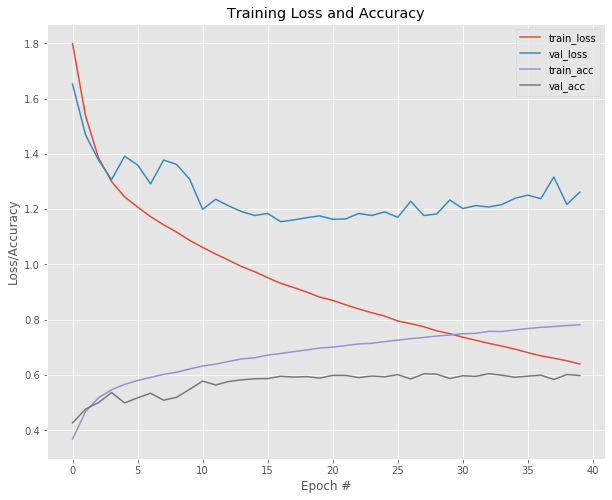

In [12]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Well Done